### plot feature kernels

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import wasserstein_distance

import sys
sys.path.append('../')
from expt_configs import old_configs, bs_dict, parameterization_dict, dashes_dict

print(f"keys available: {old_configs.keys()}")

keys available: dict_keys(['cartpole', 'panda', 'humanoid'])


In [59]:
# choose experiment data
config_name = 'panda'
plot_dir = "figs"

In [60]:
config = old_configs[config_name]
num_seeds = config['num_seeds']
env_name = config['env_name']
layer_sizes = config['layer_sizes']
timesteps = config['timesteps']
file_anal = config['end_dir']
temporal_anal = config['temporal_dir']
N_keys_corresponding_idxs = {4: 0, 8: 1, 16: 2, 32: 3, 48: 4, 64: 5, 128: 6, 256: 7, 512: 8, 1024: 9}
name_list = ['Initial', 'NTK', '$\mu P$']

os.makedirs(plot_dir, exist_ok=True)
fig_dir = os.path.join(plot_dir, config_name)
os.makedirs(fig_dir, exist_ok=True)

In [61]:

# load the file
data = np.load(file_anal, allow_pickle=True)
# feature_layers_dict_loaded = data["feature_layers_dict"].item()
# hdensity_loaded = data["hdensity"]
# entropys_loaded = data["entropys"] 
logits_loaded = data["logits"]
# scales_loaded = data["scales"]
# value_feature_layers_dict_loaded = data["value_feature_layers_dict"].item()
# value_preds_loaded = data["value_preds"]
# policy_actions_loaded = data["policy_actions"]

# Get temporal data
# temporal_data = np.load(temporal_anal, allow_pickle=True)
# temporal_feature_layers_dict_loaded = temporal_data["feature_layers_time_dict"].item()
# temporal_hdensity_loaded = temporal_data["hdensity_time"]
# temporal_entropys_loaded = temporal_data["entropys_time"]
# temporal_logits_loaded = temporal_data["logits_time"] 
# temporal_scales_loaded = temporal_data["scales_time"]
# temporal_value_feature_layers_dict = temporal_data["value_feature_layers_time_dict"].item()
# temporal_value_preds = temporal_data["value_preds_time"]
# temporal_policy_actions_loaded = temporal_data["policy_actions_time"]

# print(temporal_feature_layers_dict_loaded.keys())
# print(f"Temporal shapes: feature_layers={temporal_feature_layers_dict_loaded[4].shape}, hdensity={temporal_hdensity_loaded.shape}, entropys={temporal_entropys_loaded.shape}, logits={temporal_logits_loaded.shape}, scales={temporal_scales_loaded.shape}, value_feature_layers={temporal_value_feature_layers_dict[4].shape}, value_preds={temporal_value_preds.shape}, policy_actions={temporal_policy_actions_loaded.shape}")
# print(f"Temporal shapes: feature_layers={temporal_feature_layers_dict_loaded[4].shape}, hdensity={temporal_hdensity_loaded.shape}, entropys={temporal_entropys_loaded.shape}, logits={temporal_logits_loaded.shape}, scales={temporal_scales_loaded.shape}, value_feature_layers={temporal_value_feature_layers_dict[4].shape}, value_preds={temporal_value_preds.shape}")

### Analyze random features

Seed Correlation across widths: [0.17300399 0.32730319 0.59444599 0.61807256]


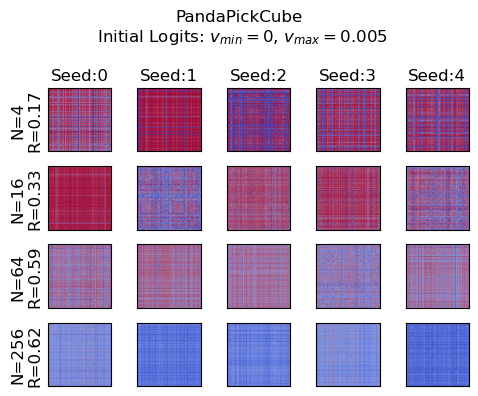

In [62]:
scaling = 0 # 0: initial, 1: NTK, 2: muP
name = name_list[scaling]
N_to_plot = [4, 16, 64, 256]

f, ax = plt.subplots(4, 5, figsize=(1*5, 1*4))
vmax = 0.005
f.suptitle(f"{env_name}\n {name} Logits: $v_{{min}}=0$, $v_{{max}}={vmax}$")
l = 0

logit_sim = np.zeros(len(N_to_plot))
A = []
Ax = []
for N in N_to_plot:
    n =  N_keys_corresponding_idxs[N]

    storex = []
    store= []
    for s in range(5):
        x =  logits_loaded[scaling, n, s]
        k = x@x.T # don't normalize by N
        im = ax[l, s].imshow(k, aspect='equal',cmap='coolwarm',vmin=0, vmax=vmax)
        # plt.colorbar(im, ax=ax[l,s])
        ax[l,s].set_xticks([])
        ax[l,s].set_yticks([])
        storex.append(k.reshape(1,-1))
        ax[0,s].set_title(f"Seed:{s}",fontsize=12)
        store.append(x)

    # compute cross sim
    storex = np.concatenate(storex, axis=0)
    tri_vals = np.corrcoef(storex)
    logit_sim[l] = tri_vals[np.triu_indices_from(tri_vals, k=1)].mean()
    ax[l, 0].set_ylabel(f"N={N}\nR={logit_sim[l]:.2f}", fontsize=12)
    A.append(storex)
    Ax.append(store)
    
    l +=1
f.tight_layout()
f.savefig(f"{fig_dir}/logit_seed_{name}_{env_name}.pdf",bbox_inches='tight')
print("Seed Correlation across widths:", logit_sim)

### Analyze NTK features

[0.18693931 0.45454059 0.51500336 0.56223372]


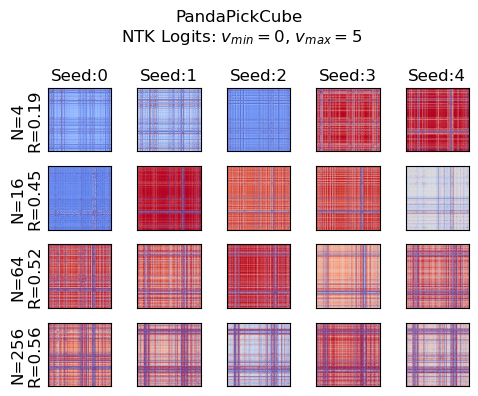

In [63]:
scaling = 1 # 0: initial, 1: NTK, 2: muP
name = name_list[scaling]
N_to_plot = [4, 16, 64, 256]

f, ax = plt.subplots(4, 5, figsize=(1*5, 1*4))
vmax = 5
f.suptitle(f"{env_name}\n {name} Logits: $v_{{min}}=0$, $v_{{max}}={vmax}$")
l = 0

logit_sim = np.zeros(len(N_to_plot))
A = []
Ax = []
for N in N_to_plot:
    n =  N_keys_corresponding_idxs[N]

    storex = []
    store= []
    for s in range(5):
        x =  logits_loaded[scaling, n, s]
        k = x@x.T # don't normalize by N
        im = ax[l, s].imshow(k, aspect='equal',cmap='coolwarm',vmin=0, vmax=vmax)
        # plt.colorbar(im, ax=ax[l,s])
        ax[l,s].set_xticks([])
        ax[l,s].set_yticks([])
        storex.append(k.reshape(1,-1))
        ax[0,s].set_title(f"Seed:{s}",fontsize=12)
        store.append(x)

    # compute cross sim
    storex = np.concatenate(storex, axis=0)
    tri_vals = np.corrcoef(storex)
    logit_sim[l] = tri_vals[np.triu_indices_from(tri_vals, k=1)].mean()
    ax[l, 0].set_ylabel(f"N={N}\nR={logit_sim[l]:.2f}", fontsize=12)
    A.append(storex)
    Ax.append(store)
    
    l +=1
f.tight_layout()
f.savefig(f"{fig_dir}/logit_seed_{name}_{env_name}.pdf",bbox_inches='tight')
print(logit_sim)

### Analyze muP Features

[0.21531635 0.70100987 0.75420117 0.9059479 ]


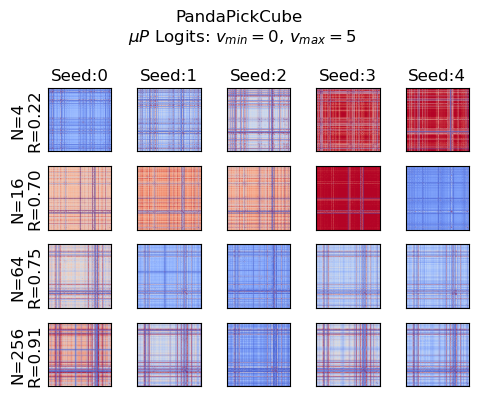

In [64]:
scaling = 2 # 0: initial, 1: NTK, 2: muP
name = name_list[scaling]
N_to_plot = [4, 16, 64, 256]


f, ax = plt.subplots(4, 5, figsize=(1*5, 1*4))
vmax = 5
f.suptitle(f"{env_name}\n {name} Logits: $v_{{min}}=0$, $v_{{max}}={vmax}$")
l = 0

logit_sim = np.zeros(len(N_to_plot))
A = []
Ax = []
for N in N_to_plot:
    n =  N_keys_corresponding_idxs[N]

    storex = []
    store= []
    for s in range(5):
        x =  logits_loaded[scaling, n, s]
        k = x@x.T # don't normalize by N
        im = ax[l, s].imshow(k, aspect='equal',cmap='coolwarm',vmin=0, vmax=vmax)
        # plt.colorbar(im, ax=ax[l,s])
        ax[l,s].set_xticks([])
        ax[l,s].set_yticks([])
        storex.append(k.reshape(1,-1))
        ax[0,s].set_title(f"Seed:{s}",fontsize=12)
        store.append(x)

    # compute cross sim
    storex = np.concatenate(storex, axis=0)
    tri_vals = np.corrcoef(storex)
    logit_sim[l] = tri_vals[np.triu_indices_from(tri_vals, k=1)].mean()
    ax[l, 0].set_ylabel(f"N={N}\nR={logit_sim[l]:.2f}", fontsize=12)
    A.append(storex)
    Ax.append(store)
    
    l +=1
f.tight_layout()
f.savefig(f"{fig_dir}/logit_seed_{name}_{env_name}.pdf",bbox_inches='tight')
print(logit_sim)

### Plot all 3 together

In [65]:
logits_loaded.shape

(3, 10, 5, 858, 8)

/tmp/ipykernel_1941303/1792957332.py:38: UserWarning: The figure layout has changed to tight
  f.tight_layout()


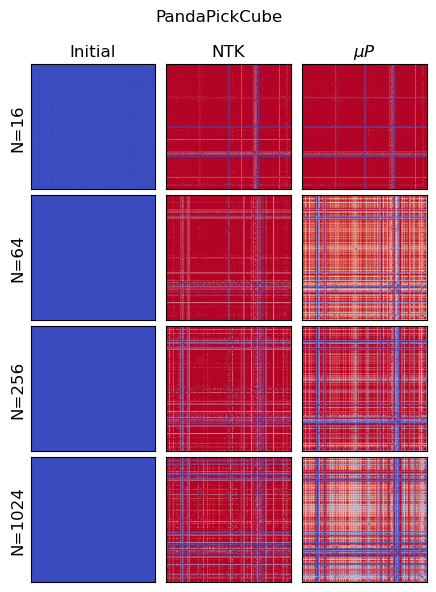

In [72]:

cmap = plt.get_cmap("viridis")
# get individual colors from viridis

N_to_plot = [16, 64, 256, 1024]
num_models = logits_loaded.shape[1]
colors = [cmap(i / (num_models-1)) for i in range(num_models)]
feat_sim = np.zeros(3)

f,ax = plt.subplots(len(N_to_plot), 3, figsize=(1.5*3, 1.5*(len(N_to_plot))),  constrained_layout=True)
f.suptitle(env_name)

for scaling in range(3):
    if env_name == 'cartpole':
        vmax = 0.1
    elif env_name == 'panda':
        vmax = 1
    else:
        vmax = 2

    for i, key in enumerate(N_to_plot):
        
        n =  N_keys_corresponding_idxs[key]

        X = logits_loaded[scaling, n]
        K = np.einsum('ijk,ilk->ijl', X, X)

        K_mean = np.nanmean(K,axis=0)

        ax[i,scaling].imshow(K_mean, aspect='equal',cmap='coolwarm',vmin=0, vmax=vmax)

        ax[i,scaling].set_xticks([])
        ax[i,scaling].set_yticks([])
        ax[i, 0].set_ylabel(f"N={key}", fontsize=12)

    ax[0,scaling].set_title(name_list[scaling],fontsize=12)


f.tight_layout()
f.subplots_adjust(wspace=0.05, hspace=0.05)
f.savefig(f"{fig_dir}/logits_{env_name}.pdf",bbox_inches='tight')

### CKA within seeds and across width

In [67]:
from scipy.spatial import procrustes
from numpy.linalg import norm

def centered_kernel_alignment(X, Y):
    """
    Computes centered kernel alignment between two matrices.
    Both matrices are expected to be of shape (n_samples, n_features).
    """
    def center_kernel(K):
        n = K.shape[0]
        H = np.eye(n) - np.ones((n, n))/n
        return H @ K @ H
    
    Kx = X @ X.T
    Ky = Y @ Y.T
    Kx_c = center_kernel(Kx)
    Ky_c = center_kernel(Ky)
    numerator = np.sum(Kx_c * Ky_c)
    denominator = np.sqrt(np.sum(Kx_c ** 2) * np.sum(Ky_c ** 2))
    return numerator / denominator

def procrustes_alignment(X, Y):
    """
    Performs Procrustes analysis and returns the similarity.
    Matrices should be of the same shape (n_samples, n_features).
    """
    # scipy's procrustes aligns the shapes, returning mtx1, mtx2, disparity
    _, _, disparity = procrustes(X, Y)
    # Similarity can be defined as 1 - disparity (lower disparity = higher similarity)
    return 1 - disparity

def cosine_similarity_matrix(A, B):
    """
    Computes cosine similarity between two matrices (flattened).
    """
    a_flat = A.flatten()
    b_flat = B.flatten()
    return np.dot(a_flat, b_flat) / (norm(a_flat) * norm(b_flat))

In [68]:
# CKA analysis within seeds and across width
across_width = np.zeros((3, len(layer_sizes), len(layer_sizes)))
within_seed = np.zeros((3,len(layer_sizes), num_seeds, num_seeds))
across_scales = np.zeros((len(layer_sizes), 3, 3))

samples = logits_loaded.shape[-2]
Ks = np.zeros([3, len(layer_sizes), samples, samples])
for scaling in range(3):

    for i, N in enumerate(N_to_plot):

        n =  N_keys_corresponding_idxs[N]

        X = logits_loaded[scaling, n]
        K = np.einsum('ijk,imn->ijm', X, X) # shape (num_seeds, num_points, num_points)

        n = layer_sizes.index(N)
        Ks[scaling, n] = np.nanmean(K, axis=0)
        
        for i in range(num_seeds):
            for j in range(num_seeds):
                if i < j:
                    within_seed[scaling, n, i, j] = centered_kernel_alignment(K[i], K[j])

    for i, N2 in enumerate(layer_sizes):
        for j, N3 in enumerate(layer_sizes):
            if i < j:
                across_width[scaling, i, j] = centered_kernel_alignment(Ks[scaling, i], Ks[scaling, j])

for i in range(3):
    for j in range(3):
        if i < j:
            for n, N in enumerate(layer_sizes):
                across_scales[n, i, j] = centered_kernel_alignment(Ks[i, n], Ks[j, n])


/tmp/ipykernel_1941303/4024343452.py:20: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator


In [69]:
# get the mean of the lower triangular value of the matrix
within_seed_mean = np.zeros((3, len(layer_sizes)))
for scaling in range(3):
    for n in range(len(layer_sizes)):
        tri_vals = within_seed[scaling, n]
        within_seed_mean[scaling, n] = tri_vals[np.triu_indices_from(tri_vals, k=1)].mean()

across_width_mean = np.zeros(3)
for scaling in range(3):
    tri_vals = across_width[scaling]
    across_width_mean[scaling] = tri_vals[np.triu_indices_from(tri_vals, k=1)].mean()

across_scales_simple = np.zeros((len(layer_sizes),3))
for n in range(len(layer_sizes)):
    tri_vals = across_scales[n]
    across_scales_simple[n] = tri_vals[np.triu_indices_from(tri_vals, k=1)]

print("Within seed CKA mean:", within_seed_mean)
print("Across width CKA mean:", across_width_mean)

# generate unique string combinations using name_list
combinations = {}
for i in range(3):
    for j in range(i+1, 3):
        combinations[f"{name_list[i]} vs {name_list[j]}"] = across_scales[:, i, j]
        print(f"{name_list[i]} vs {name_list[j]}: {across_scales[:, i, j]}")


Within seed CKA mean: [[0.         0.01580833 0.07432834 0.09498424 0.06102756]
 [0.         0.44687728 0.45287104 0.65453764 0.69529528]
 [0.         0.34083439 0.38038389 0.73093421 0.89395953]]
Across width CKA mean: [nan nan nan]
Initial vs NTK: [       nan 0.00119394 0.00724571 0.00368279 0.00467023]
Initial vs $\mu P$: [       nan 0.00186113 0.0022687  0.00252132 0.00132704]
NTK vs $\mu P$: [       nan 0.84590309 0.55354044 0.64557584 0.53891702]


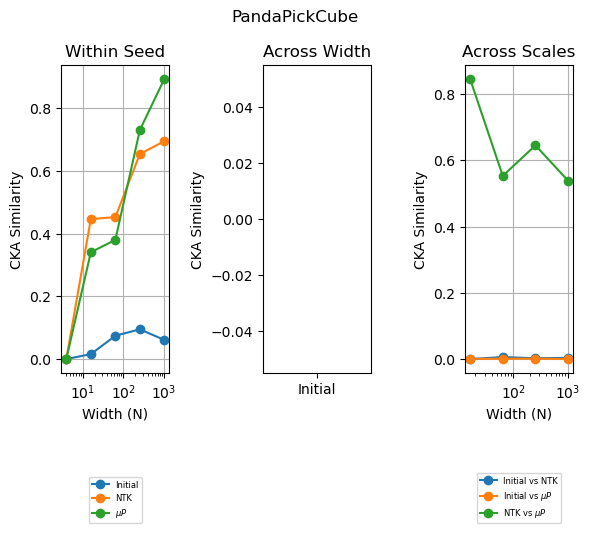

In [70]:
plt.figure(figsize=(6,5))
plt.suptitle(env_name)
plt.subplot(131)
for scaling in range(3):
    plt.plot(layer_sizes, within_seed_mean[scaling], label=name_list[scaling], marker='o')
plt.xscale('log')
plt.xlabel('Width (N)')
plt.ylabel('CKA Similarity')
plt.title(f'Within Seed')
plt.legend(fontsize=6, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=1)
plt.grid(True)

plt.subplot(132)
plt.bar(name_list, across_width_mean)
plt.ylabel('CKA Similarity')
plt.title(f'Across Width')
plt.tight_layout()

plt.subplot(133)
for key,value in combinations.items():
    plt.plot(layer_sizes, value, label=key, marker='o')
plt.xscale('log')
plt.xlabel('Width (N)')
plt.ylabel('CKA Similarity')
plt.title(f'Across Scales')
plt.legend(fontsize=6, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=1)
plt.grid(True)
plt.tight_layout()

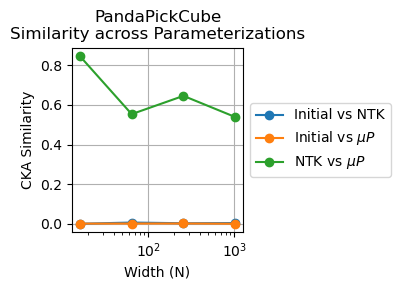

In [71]:
plt.figure(figsize=(4,3))
for key,value in combinations.items():
    plt.plot(layer_sizes, value, label=key, marker='o')
plt.xscale('log')
plt.xlabel('Width (N)')
plt.ylabel('CKA Similarity')
plt.title(f'{env_name}\nSimilarity across Parameterizations')
plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{fig_dir}/cka_logits_summary_{env_name}.pdf",bbox_inches='tight')